In [ ]:
!pip install pytorch-lightning

In [ ]:
!pip install pycaret

In [ ]:
# import basic libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from datetime import datetime
import scipy.stats as ss
from scipy.stats.mstats import winsorize
from scipy import stats
import math
from matplotlib.colors import ListedColormap

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score, classification_report # Added classification_report here
from sklearn.model_selection import learning_curve

# Install imblearn if you haven't already
!pip install imblearn

# Import the necessary module
from imblearn.over_sampling import RandomOverSampler


In [ ]:
# load data
data = pd.read_csv('/content/Cusomer.csv')

# Convert 'checkout_time' to datetime objects
data['checkout_started_at'] = pd.to_datetime(data['checkout_started_at'])
data['checkout_completed_at'] = pd.to_datetime(data['checkout_completed_at']) # Fixed the typo here

# Calculate the time difference between checkout_started_at and checkout_completed_at
data['checkout_time'] = data['checkout_completed_at'] - data['checkout_started_at']

# Extract minutes and seconds from timedelta
data['checkout_time'] = data['checkout_time'].apply(lambda x: f"{x.seconds // 60:02}:{x.seconds % 60:02}")

# Drop original 'checkout_time'
data = data.drop(['checkout_started_at','checkout_completed_at'], axis=1) # Also fixed this line to correctly drop multiple columns
data.head()

,customer_id,order_id,customer_added_non_med_to_order,order_total_dollars,checkout_time
0,8389.0,10000.0,False,11.75,14:51
1,6811.0,10001.0,False,19.83,03:40
2,9441.0,10002.0,False,21.59,06:43
3,1125.0,10003.0,False,15.50,04:32
4,7838.0,10004.0,False,15.49,09:23


Number of duplicates: 0


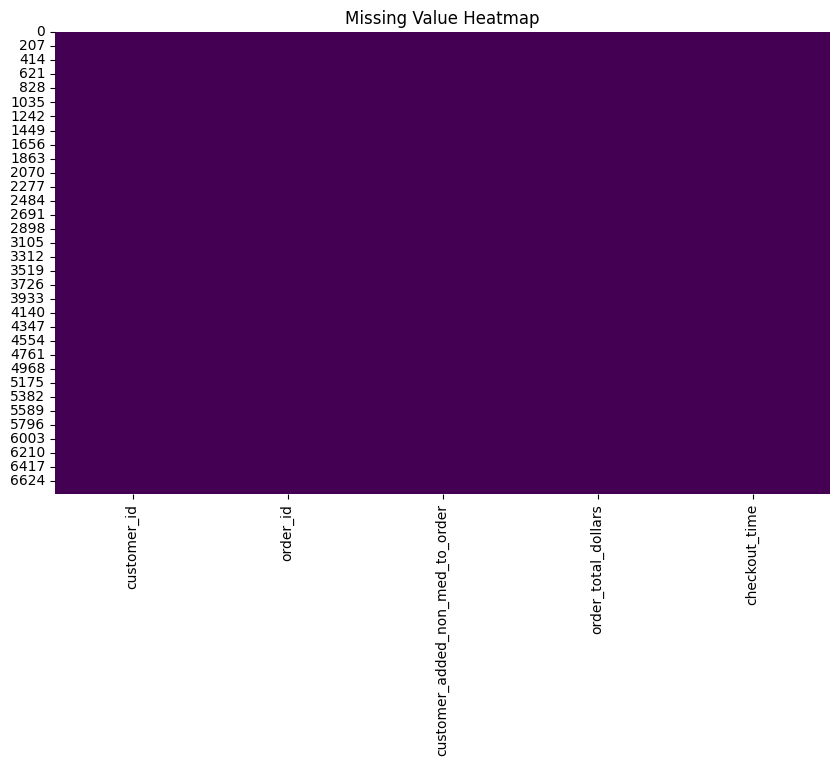

In [ ]:
# EDA

# Duplicates
duplicates = data.duplicated().sum()
print('Number of duplicates:', duplicates)

# Missing Value Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [ ]:
# Split target and feature
X = data.drop('customer_added_non_med_to_order', axis=1)
y = data['customer_added_non_med_to_order']

# Convert 'checkout_time' to total seconds
X['checkout_time'] = X['checkout_time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# # Train a Random Forest Classifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Predict new instances
# y_pred = model.predict(X_test)

# # Evaluate performance
# print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.96      0.99      0.98      1286
        True       0.68      0.36      0.47        78

    accuracy                           0.95      1364
   macro avg       0.82      0.67      0.72      1364
weighted avg       0.95      0.95      0.95      1364



In [ ]:
# Calculate original metrics
original_total_orders = X['order_id'].sum()
original_avg_order_amount = X['order_total_dollars'].mean()

# Oversample to 20% "True" instances
oversampler = RandomOverSampler(sampling_strategy=0.25, random_state=7) # 0.25 because 1/4 = 25% and we want 20% to be true and 80% to be false
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Calculate metrics for oversampled data
oversampled_total_orders = X_resampled['order_id'].sum()
oversampled_avg_order_amount = X_resampled['order_total_dollars'].mean()

# Compare original and oversampled metrics
print("Original Total Orders:", original_total_orders)
print("Oversampled Total Orders:", oversampled_total_orders)
print("Original Average Order Amount:", original_avg_order_amount)
print("Oversampled Average Order Amount:", oversampled_avg_order_amount)

# Calculate percentage change
avg_order_amount_change = ((oversampled_avg_order_amount - original_avg_order_amount) / original_avg_order_amount) * 100

# Financial Impact
print(f"Percentage Change in Average Order Amount: {avg_order_amount_change:.2f}%")

Original Total Orders: 92103940.0
Oversampled Total Orders: 110529755.0
Original Average Order Amount: 20.538499119718306
Oversampled Average Order Amount: 21.97630805628191
Percentage Change in Average Order Amount: 7.00%
